# 1. Packages

In [1]:
import numpy as np
from numpy import array, zeros

import os
import time
from tqdm.notebook import tqdm

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from math import floor
from conv_trace import Conv_trace
# from utils import GetFeature, GetPathList, GetPlotDF, GetBalanceTrainArr


In [2]:
# for face detect
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [3]:
from DCT_DETECT import DCT_DETECT

In [4]:
dct_detect = DCT_DETECT()

In [10]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
my_conv_trace = Conv_trace()

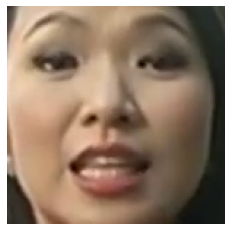

In [12]:
img = plt.imread("/home/re6091054/FF++/raw/train/Real/001/0.png")

face_rects = detector((img*255).astype('uint8'), 0)
for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()

fig=plt.imshow(img[ y1:y2,x1:x2])
plt.axis('off')
plt.savefig('./img.png', bbox_inches='tight',pad_inches = 0)


# 2. Image features

## 2.1. Make Landmark train

In [5]:
train_data_path = "/home/re6091054/FF++/c40/train"

In [288]:
# with open("ff_train_raw.txt", "r") as f:
#     text = f.read()
# text = [sub_text.split(" ") for sub_text in text.split("\n")][:-1]

In [292]:
# Deepfakes_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*0)+(720*0):(180*1)+(720*0)]
# Face2Face_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*1)+(720*1):(180*2)+(720*1)]
# FaceSwap_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*2)+(720*2):(180*3)+(720*2)]
# NeuralTextures_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*3)+(720*3):(180*4)+(720*3)]
# Real_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(720*4):]

In [291]:
# len(Deepfakes_folder), len(Face2Face_folder), len(FaceSwap_folder), len(NeuralTextures_folder), len(Real_folder)

(140, 140, 140, 140, 139)

In [293]:
# folder_list = [Deepfakes_folder, Face2Face_folder, FaceSwap_folder,  NeuralTextures_folder, Real_folder]

In [294]:
if not os.path.exists("/home/re6091054/FF++/cut/raw/train"):
    os.makedirs("/home/re6091054/FF++/cut/raw/train")

In [6]:
cut_folder_path = "/home/re6091054/FF++/cut/c40/train/"

In [1]:
# face_mark = []
# folder_path = []
# path = './train.txt'
# f = open(path, 'w')
# video_num =0
# for path in Real_folder:
#     video_num+=1
#     print(video_num)
#     num = 0
#     face_rects =[]
#     path_frame = sorted(os.listdir(path))
#     while len(face_rects)==0:
#         try:
#             img = cv2.imread(os.path.join(path,path_frame[num]))
#             face_rects = detector((img*255).astype('uint8'), 0)
#             num+=1
#             use_frame = os.path.join(path[25:],path_frame[num])
#             need_break = 'No'
#         except:
#             print('No detect', os.path.join(path,path_frame[num]))
#             need_break = 'yes'
#             break
#     if need_break=='yes':
#         continue
#     else:
#         folder_path.append(os.path.join(path[25:],path_frame[num]))
#         f.write(os.path.join(path[25:],'{}\n'.format(path_frame[num])))
#         face_mark.append(face_rects)
# f.close()

## 2.2. Make feature train

In [7]:
import pickle
# with open ('face_mark_folder_path.pickle','wb') as f:
#     pickle.dump(folder_path, f)
# with open ('face_mark.pickle','wb') as f:
#     pickle.dump(face_mark, f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/face_mark_folder_path.pickle', 'rb') as f:
    face_mark_folder_path = pickle.load(f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/face_mark.pickle', 'rb') as f:
    face_mark = pickle.load(f)

In [8]:
Deepfakes = face_mark_folder_path[:172]
Face2Face = face_mark_folder_path[172:172*2]
FaceSwap = face_mark_folder_path[172*2:172*3]
NeuralTextures = face_mark_folder_path[172*3:]
Real = face_mark_folder_path
folder_list = [Deepfakes, Face2Face, FaceSwap, NeuralTextures, Real]
type_name_list = ['Deepfakes', 'Face2Face', 'FaceSwap', 'NeuralTextures', 'Real']

In [9]:
Deepfakes_face_mark = face_mark[:172]
Face2Face_face_mark = face_mark[172:172*2]
FaceSwap_face_mark = face_mark[172*2:172*3]
NeuralTextures_face_mark = face_mark[172*3:]
Real_face_mark = face_mark
face_mark_list = [Deepfakes_face_mark, Face2Face_face_mark, FaceSwap_face_mark, NeuralTextures_face_mark, Real_face_mark]

In [10]:
path_base = '/home/re6091054/FF++/c40/'
cut_folder_path = "/home/re6091054/FF++/cut/c40/train/"

In [15]:
path

'/home/re6091054/FF++/c40/train/Real/713/1.png'

(174, 153, 3)


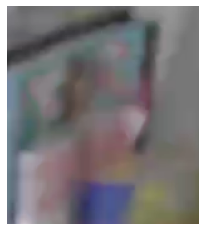

(762, 668, 3)


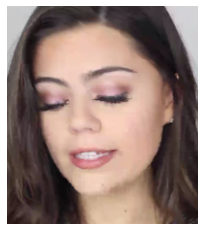

(767, 670, 3)


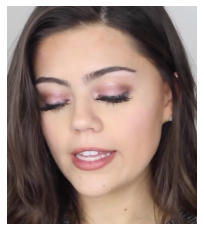

In [18]:
temp_img = cv2.imread("/home/re6091054/FF++/c40/train/Real/713/1.png")
print(temp_img.shape)
plt.imshow(temp_img[:,:,::-1])
plt.axis("off")
plt.show()

temp_img = cv2.imread("/home/re6091054/FF++/c40/train/Real/713/2.png")
print(temp_img.shape)
plt.imshow(temp_img[:,:,::-1])
plt.axis("off")
plt.show()

temp_img = cv2.imread("/home/re6091054/FF++/raw/train/Real/713/1.png")
print(temp_img.shape)
plt.imshow(temp_img[:,:,::-1])
plt.axis("off")
plt.show()

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

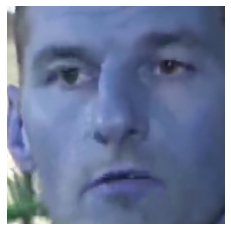

In [28]:
images_list = []
features_list = []
for type_num, folder_type in tqdm(enumerate(folder_list)):
    for frame_num, folder_frame in tqdm(enumerate(folder_type)):
        dataset_type, type_name, video_id, png_id = folder_frame.split('/')
        fake_type_video = os.listdir(os.path.join(path_base,dataset_type, type_name_list[type_num]))
        matching = [s for s in fake_type_video if video_id in s[:3]]
        if type_name == "Real" and matching[0] == '713':
            path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], "2.png")
        else:
            path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], png_id)
        img = cv2.imread(path)
        diff = 0
        while img is None:
            diff+=1
            path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], str(int(png_id.split('.')[0])-diff)+'.png')
            img = cv2.imread(path)
        face_mark = face_mark_list[type_num][frame_num]
        for i, d in enumerate(face_mark):
            x1 = abs(d.left())
            y1 = abs(d.top())
            x2 = abs(d.right())
            y2 = abs(d.bottom())
        cut_img = img[ y1:y2,x1:x2]
        fig=plt.imshow(cut_img)
        plt.axis('off')
#         if not os.path.exists(os.path.join(cut_folder_path, type_name_list[type_num], matching[0])):
#             os.makedirs(os.path.join(cut_folder_path, type_name_list[type_num], matching[0]))
#         cut_path = os.path.join(cut_folder_path, type_name_list[type_num], matching[0], png_id)
#         plt.savefig(cut_path, bbox_inches='tight',pad_inches = 0)

        images_list.append(cut_img)
        features_list.append(dct_detect.main(cut_img))

In [14]:
len(features_list)

1382

In [29]:
features_arr = np.row_stack(features_list)

response_arr = np.array(
    [1] * len(Real_face_mark) + 
    [0] * len(Real_face_mark)
)

image_type_arr = np.array(
    ["Deepfakes"] * 172 + 
    ["Face2Face"] * 172 + 
    ["FaceSwap"] * 172 + 
    ["NeuralTextures"] * 175 + 
    ["Real"] * len(Real_face_mark)
)

In [30]:
np.save("data/Cut_train_c40_features_dct.npy", features_arr)
np.save("data/Cut_train_c40_response.npy", response_arr)
np.save("data/Cut_train_c40_image_type.npy", image_type_arr)

In [31]:
features_arr = np.load("data/Cut_train_c40_features_dct.npy")
response_arr = np.load("data/Cut_train_c40_response.npy")
image_type_arr = np.load("data/Cut_train_c40_image_type.npy")

## 2.3. Make Landmark test

In [32]:
test_data_path = "/home/re6091054/FF++/c40/test"

In [ ]:
with open("ff_test_raw.txt", "r") as f:
    text = f.read()
text = [sub_text.split(" ") for sub_text in text.split("\n")][:-1]

In [ ]:
Deepfakes = [s for s in text if 'Deepfakes' in s[0]]
Face2Face = [s for s in text if 'Face2Face' in s[0]]
FaceSwap = [s for s in text if 'FaceSwap' in s[0]]
NeuralTextures = [s for s in text if 'NeuralTextures' in s[0]]
Real = [s for s in text if 'Real' in s[0]]

In [ ]:
Deepfakes_folder = [test_data_path + "/" + folder_name for folder_name, y in Deepfakes]
Face2Face_folder = [test_data_path + "/" + folder_name for folder_name, y in Face2Face]
FaceSwap_folder = [test_data_path + "/" + folder_name for folder_name, y in FaceSwap]
NeuralTextures_folder = [test_data_path + "/" + folder_name for folder_name, y in NeuralTextures]
Real_folder = [test_data_path + "/" + folder_name for folder_name, y in Real]

In [ ]:
len(Deepfakes_folder), len(Face2Face_folder), len(FaceSwap_folder), len(NeuralTextures_folder), len(Real_folder)

In [ ]:
folder_list = [Deepfakes_folder, Face2Face_folder, FaceSwap_folder,  NeuralTextures_folder, Real_folder]

In [ ]:
if not os.path.exists("/home/re6091054/FF++/cut/raw/test"):
    os.makedirs("/home/re6091054/FF++/cut/raw/test")

In [33]:
cut_folder_path = "/home/re6091054/FF++/cut/c40/test/"

In [ ]:
face_mark = []
folder_path = []
path = './test.txt'
f = open(path, 'w')
video_num =0
for path in Real_folder:
    video_num+=1
    print(video_num)
    num = 0
    face_rects =[]
    path_frame = sorted(os.listdir(path))
    while len(face_rects)==0:
        try:
            img = cv2.imread(os.path.join(path,path_frame[num]))
            face_rects = detector((img*255).astype('uint8'), 0)
            num+=1
            use_frame = os.path.join(path[25:],path_frame[num])
            need_break = 'No'
        except:
            print('No detect', os.path.join(path,path_frame[num]))
            need_break = 'yes'
            break
    if need_break=='yes':
        continue
    else:
        folder_path.append(os.path.join(path[25:],path_frame[num]))
        f.write(os.path.join(path[25:],'{}\n'.format(path_frame[num])))
        face_mark.append(face_rects)
f.close()

## 2.1. Make feature test

In [34]:
import pickle
# with open ('test_face_mark_folder_path.pickle','wb') as f:
#     pickle.dump(folder_path, f)
# with open ('test_face_mark.pickle','wb') as f:
#     pickle.dump(face_mark, f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/test_face_mark_folder_path.pickle', 'rb') as f:
    face_mark_folder_path = pickle.load(f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/test_face_mark.pickle', 'rb') as f:
    face_mark = pickle.load(f)

In [35]:
Deepfakes_face_mark = face_mark
Face2Face_face_mark = face_mark
FaceSwap_face_mark = face_mark
NeuralTextures_face_mark = face_mark
Real_face_mark = face_mark
face_mark_list = [Deepfakes_face_mark, Face2Face_face_mark, FaceSwap_face_mark, NeuralTextures_face_mark, Real_face_mark]

In [36]:
Deepfakes = face_mark_folder_path
Face2Face = face_mark_folder_path
FaceSwap = face_mark_folder_path
NeuralTextures = face_mark_folder_path
Real = face_mark_folder_path
folder_list = [Deepfakes, Face2Face, FaceSwap, NeuralTextures, Real]
type_name_list = ['Deepfakes', 'Face2Face', 'FaceSwap', 'NeuralTextures', 'Real']

In [37]:
path_base = '/home/re6091054/FF++/c40/'
cut_folder_path = "/home/re6091054/FF++/cut/c40/test/"

In [38]:
images_list = []
features_list = []
for type_num, folder_type in tqdm(enumerate(folder_list)):
    for frame_num, folder_frame in tqdm(enumerate(folder_type)):
        dataset_type, type_name, video_id, png_id = folder_frame.split('/')
        fake_type_video = os.listdir(os.path.join(path_base,dataset_type, type_name_list[type_num]))
        matching = [s for s in fake_type_video if video_id in s[:3]]
        path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], png_id)
        img = cv2.imread(path)
        diff = 0
        while img is None:
            diff+=1
            path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], str(int(png_id.split('.')[0])-diff)+'.png')
            img = cv2.imread(path)
        face_mark = face_mark_list[type_num][frame_num]
        for i, d in enumerate(face_mark):
            x1 = abs(d.left())
            y1 = abs(d.top())
            x2 = abs(d.right())
            y2 = abs(d.bottom())
        cut_img = img[ y1:y2,x1:x2]
#         fig=plt.imshow(cut_img)
#         plt.axis('off')
#         if not os.path.exists(os.path.join(cut_folder_path, type_name_list[type_num], matching[0])):
#             os.makedirs(os.path.join(cut_folder_path, type_name_list[type_num], matching[0]))
#         cut_path = os.path.join(cut_folder_path, type_name_list[type_num], matching[0], png_id)
#         plt.savefig(cut_path, bbox_inches='tight',pad_inches = 0)

        images_list.append(cut_img)
        features_list.append(dct_detect.main(cut_img))


|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [39]:
len(features_list)

660

In [44]:
features_arr = np.row_stack(features_list)

response_arr = np.array(
    [1] * (4*len(Real_face_mark)) + 
    [0] * len(Real_face_mark)
)

image_type_arr = np.array(
    ["Deepfakes"] * len(Real_face_mark) + 
    ["Face2Face"] * len(Real_face_mark) + 
    ["FaceSwap"] * len(Real_face_mark) + 
    ["NeuralTextures"] * len(Real_face_mark) + 
    ["Real"] * len(Real_face_mark)
)

In [46]:
features_arr.shape, response_arr.shape

((660, 63), (660,))

In [47]:
np.save("data/Cut_test_c40_features_dct.npy", features_arr)
np.save("data/Cut_test_c40_response.npy", response_arr)
np.save("data/Cut_test_c40_image_type.npy", image_type_arr)

In [48]:
np.load("data/Cut_test_c40_features_dct.npy").shape, \
np.load("data/Cut_test_c40_response.npy").shape, \
np.load("data/Cut_test_c40_image_type.npy").shape

((660, 63), (660,), (660,))

In [49]:
np.load("data/Cut_test_raw_features_dct.npy").shape, \
np.load("data/Cut_test_raw_response.npy").shape, \
np.load("data/Cut_test_raw_image_type.npy").shape

((660, 63), (264,), (660,))

In [43]:
os.getcwd()

'/home/r26094022/DIPCV/final'

## 3. Load features

In [ ]:
train_x = np.load("data/Cut_train_features_Conv_trace.npy")
response_arr = np.load("data/Cut_train_response.npy")
image_type_arr = np.load("data/Cut_train_image_type.npy")

In [253]:
features_arr = np.load("data/Cut_test_features_Conv_trace.npy")
response_arr = np.load("data/Cut_test_response.npy")
image_type_arr = np.load("data/Cut_test_image_type.npy")

In [207]:
train_x_Conv_trace = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_train_features_Conv_trace.npy')
train_y = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_train_response.npy')
train_image_type = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_train_image_type.npy')

test_x_Conv_trace = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_test_features_Conv_trace.npy')
test_y = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_test_response.npy')
test__image_type = np.load('/home/re6091054/影像處理與電腦視覺/fianl_compression/data/Cut_test_image_type.npy')


((1382, 24), (1382,), (1382,))